Original data with errors was incorrectly joined and was missing a lot of records. New analysis on "fixed" data

In [1]:
import datetime

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.options.mode.chained_assignment = None

## helper funcs

In [2]:
def plot_min_fare(market_pdf, dd, market):
    trip_df = market_pdf[(market_pdf['out_departure_date'] == dd)] #& (market_pdf['inDeptDt'] == rd)]
    trip_df.sort_values(by='shopDate_dt', inplace=True)
    plt.figure(figsize=(8,3))
    plt.plot(-trip_df['days_til_dept'], trip_df['fare'], marker='o')
    plt.xlabel("advanced purchase days")
    plt.ylabel('min fare (USD)')
    plt.title(f"{market} - depart {dd}");

# load & eval data

In [3]:
DATA_DIR = "../../output/aws-data/engineered-features/v3/"
df = pd.read_parquet(DATA_DIR)

In [4]:
df.head()

,market,out_departure_date,shop_date,fare_rank,num_itin,fare,out_cxrs,solution_counts,shop_counts,avg_out_avail_max,avg_out_avail_low,outDeptDt_dt,shopDate_dt,days_til_dept,dept_dt_dow_int,dept_dt_dow,is_holiday,fr2_fare,fr2_out_cxrs,fr2_avg_out_avail_max,fr2_avg_out_avail_low,fr1_fr2_out_cxrs_same,fr1_fr2_out_cxrs_overlap,avg_fare_dtd,fare_prev_shop_day,fr2_fare_prev_shop_day,avg_out_avail_max_prev_shop_day,avg_out_avail_low_prev_shop_day,num_itin_prev_shop_day,shop_counts_prev_shop_day,solution_counts_prev_shop_day,fare_prev_dept_day,fare_next_dept_day,fare_diff_prev_dept_day,fare_diff_next_dept_day,trailing_avg_shop_counts,trailing_avg_solution_counts,trailing_avg_fare,trailing_std_fare,avg_diff_prev_dept_day,avg_diff_next_dept_day,est_fare_from_prev_dept_day,est_fare_from_next_dept_day
0,JFK-LAX,20221207,20221029,1,6,128.6,[B6],7808,257,0.000000,0.0,2022-12-07,2022-10-29,39,2,Wed,0,151.6,"[B6, DL, AS]",0.5,0.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.6,128.6,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JFK-LAX,20230301,20221029,1,17,151.6,"[DL, B6, AA]",950,25,0.352941,0.0,2023-03-01,2022-10-29,123,2,Wed,0,159.1,[AA],0.0,0.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.6,151.6,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JFK-LAX,20221130,20221029,1,2,160.6,[AA],16656,632,0.000000,0.0,2022-11-30,2022-10-29,32,2,Wed,0,168.6,[B6],0.0,0.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.6,151.6,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JFK-LAX,20221228,20221029,1,1,221.6,[DL],6772,345,1.000000,0.0,2022-12-28,2022-10-29,60,2,Wed,1,368.6,[B6],0.0,0.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408.6,191.6,-187.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JFK-LAX,20230118,20221029,1,7,128.6,[DL],5278,151,1.000000,0.0,2023-01-18,2022-10-29,81,2,Wed,0,141.6,[B6],0.0,0.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.6,148.6,0.0,-20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(df)

133361

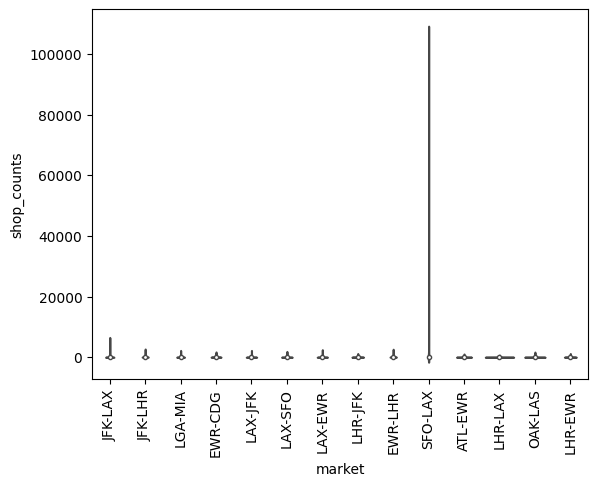

In [7]:
sns.violinplot(df, x='market', y='shop_counts');
plt.xticks(rotation=90);

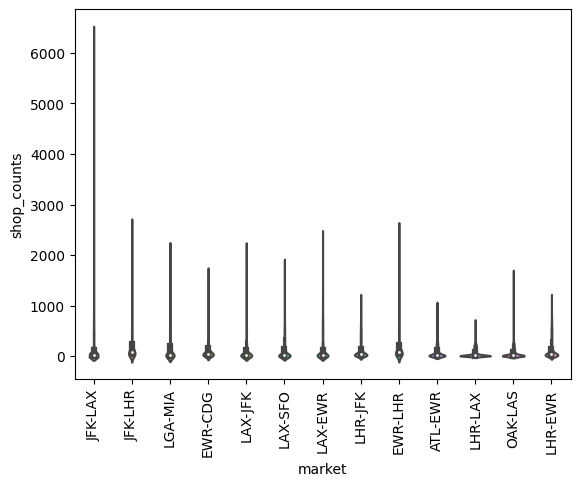

In [8]:
sns.violinplot(df[df['market'] != 'SFO-LAX'], x='market', y='shop_counts');
plt.xticks(rotation=90);

In [9]:
df.sort_values(by='shop_counts', ascending=False).head(10)

,market,out_departure_date,shop_date,fare_rank,num_itin,fare,out_cxrs,solution_counts,shop_counts,avg_out_avail_max,avg_out_avail_low,outDeptDt_dt,shopDate_dt,days_til_dept,dept_dt_dow_int,dept_dt_dow,is_holiday,fr2_fare,fr2_out_cxrs,fr2_avg_out_avail_max,fr2_avg_out_avail_low,fr1_fr2_out_cxrs_same,fr1_fr2_out_cxrs_overlap,avg_fare_dtd,fare_prev_shop_day,fr2_fare_prev_shop_day,avg_out_avail_max_prev_shop_day,avg_out_avail_low_prev_shop_day,num_itin_prev_shop_day,shop_counts_prev_shop_day,solution_counts_prev_shop_day,fare_prev_dept_day,fare_next_dept_day,fare_diff_prev_dept_day,fare_diff_next_dept_day,trailing_avg_shop_counts,trailing_avg_solution_counts,trailing_avg_fare,trailing_std_fare,avg_diff_prev_dept_day,avg_diff_next_dept_day,est_fare_from_prev_dept_day,est_fare_from_next_dept_day
81187,SFO-LAX,20221218,20221119,1,2,73.39,[WN],6280913,107541,0.5,0.0,2022-12-18,2022-11-19,29,6,Sun,1,83.28,[WN],0.000000,0.000000,True,True,49.572500,73.39,88.60,1.0,0.0,1.0,21989.0,1316541.0,73.39,88.60,0.00,-15.21,5811.0,338486.25,72.2975,16.515226,3.337590,8.650500,76.727590,97.250500
80747,SFO-LAX,20221204,20221106,1,1,47.24,[UA],5646938,107160,1.0,0.0,2022-12-04,2022-11-06,28,6,Sun,0,47.93,[DL],1.000000,0.000000,False,False,62.364286,47.24,47.93,1.0,0.0,1.0,105261.0,6059526.0,48.60,48.60,-1.36,-1.36,33191.0,1935224.00,47.6650,0.643610,0.883922,9.624062,49.483922,58.224063
80711,SFO-LAX,20221204,20221105,1,1,47.24,[UA],6059526,105261,1.0,0.0,2022-12-04,2022-11-05,29,6,Sun,0,47.93,[DL],1.000000,0.000000,False,False,55.733333,47.24,47.58,1.0,0.0,1.0,25637.0,1622087.0,48.60,48.60,-1.36,-1.36,7095.5,428136.00,48.0050,0.700928,1.485136,10.747104,50.085136,59.347104
27490,SFO-LAX,20221224,20221127,1,1,58.54,[WN],4614414,102134,1.0,0.0,2022-12-24,2022-11-27,27,5,Sat,1,78.34,[WN],1.000000,0.000000,True,True,53.740000,58.54,78.34,1.0,0.0,1.0,95682.0,4615875.0,78.59,48.60,-20.05,9.94,68138.5,3181907.75,63.5525,10.025000,-6.109237,-5.498896,72.480763,43.101104
16037,SFO-LAX,20221129,20221031,1,1,47.24,[UA],6213132,101577,1.0,0.0,2022-11-29,2022-10-31,29,1,Tue,0,47.93,[DL],1.000000,0.000000,False,False,72.720000,47.24,47.93,1.0,0.0,1.0,45622.0,2677645.0,48.60,47.24,-1.36,0.00,23074.5,1348539.50,47.9200,0.961665,-5.927500,-2.454722,42.672500,44.785278
30850,SFO-LAX,20221208,20221109,1,1,47.24,[UA],5947499,99576,1.0,0.0,2022-12-08,2022-11-09,29,3,Thu,0,48.60,"[B6, AS, UA]",0.314286,0.000000,False,True,52.608000,47.24,48.60,1.0,0.0,1.0,14951.0,851534.0,48.60,48.60,-1.36,-1.36,4065.0,224603.75,48.0050,0.700928,8.341270,-12.866763,56.941270,35.733237
27415,SFO-LAX,20221224,20221125,1,1,58.54,[WN],4515614,99091,1.0,0.0,2022-12-24,2022-11-25,29,5,Sat,1,78.34,[WN],1.000000,0.000000,True,True,53.921154,58.54,78.34,1.0,0.0,1.0,77059.0,3582566.0,78.59,48.60,-20.05,9.94,19664.5,903583.75,76.0800,12.609549,-6.811240,-5.483571,71.778760,43.116429
27452,SFO-LAX,20221224,20221126,1,1,58.54,[WN],4615875,95682,1.0,0.0,2022-12-24,2022-11-26,28,5,Sat,1,78.34,[WN],1.000000,0.000000,True,True,57.443704,58.54,78.34,1.0,0.0,1.0,99091.0,4515614.0,78.59,48.60,-20.05,9.94,44343.5,2030495.50,68.5650,11.575873,-6.248811,-5.534277,72.341189,43.065723
81228,SFO-LAX,20221218,20221120,1,1,73.39,[WN],5885892,94895,1.0,0.0,2022-12-18,2022-11-20,28,6,Sun,1,83.28,[WN],0.000000,0.666667,True,True,54.029048,73.39,83.28,0.5,0.0,2.0,107541.0,6280913.0,88.60,88.60,-15.21,-15.21,32605.0,1905782.00,78.4950,5.894746,3.653577,8.902996,92.253577,97.502996
76729,SFO-LAX,20221221,20221122,1,12,48.60,"[B6, AS]",5183008,89188,0.0,0.0,2022-12-21,2022-11-22,29,2,Wed,1,58.54,[WN],1.000000,0.000000,False,False,52.233478,58.54,61.37,0.5,0.5,2.0,22580.0,1288528.0,48.60,73.39,0.00,-24.79,5988.0,333080.00,76.0850,15.023345,-0.772611,-9.075848,47.827389,64.314152


More than just one "anomalously" high shop-count day for SFO-LAX

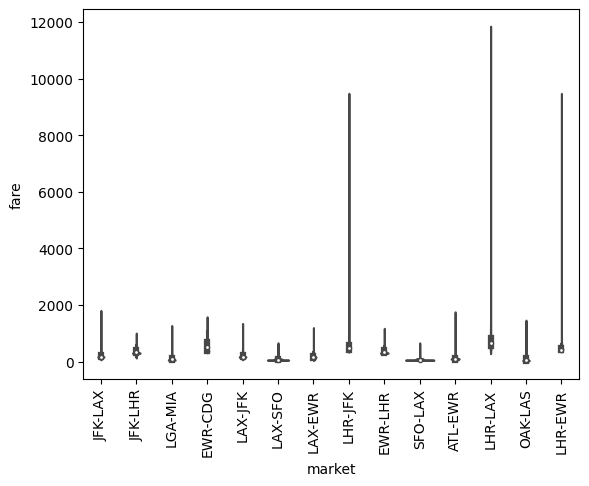

In [14]:
sns.violinplot(df, x='market', y='fare');
plt.xticks(rotation=90);

In [13]:
mfare_summary = df.groupby('market').agg(
    {'fare': ['count', 'mean', np.median, 'min', 'max']}
)
mfare_summary

fare                                      
         count        mean  median     min       max
market                                              
ATL-EWR   6737  100.730224   98.60   43.59   1739.34
EWR-CDG  11446  535.534479  504.20  359.10   1531.80
EWR-LHR  11409  360.184326  327.50  284.40   1147.30
JFK-LAX   9645  194.984948  170.10   89.60   1778.60
JFK-LHR  11401  360.012742  327.50  150.80    979.50
LAX-EWR   9724  177.666806  158.60   66.97   1168.60
LAX-JFK   9641  191.914048  168.60   89.60   1318.60
LAX-SFO   8689   64.498739   48.60   38.60    648.60
LGA-MIA   8730  103.219942   95.60   23.97   1248.59
LHR-EWR  11027  459.939218  421.28  380.58   9446.48
LHR-JFK  11028  505.595379  482.38  375.78   9446.48
LHR-LAX   9398  766.666034  648.08  441.88  11700.28
OAK-LAS   6027   88.017694   43.98   23.97   1417.21
SFO-LAX   8459   63.407714   48.60   39.86    648.60

In [27]:
clip_df = df[df['days_til_dept'] <= 120]
mfare_summary = clip_df.groupby('market').agg(
    {'fare': ['count', 'mean', np.median, 'min', 'max']}
)
mfare_summary

fare                                     
        count        mean  median     min      max
market                                            
ATL-EWR  3744   77.993186   72.59   43.59   238.60
EWR-CDG  3744  437.609199  369.50  359.10  1053.80
EWR-LHR  3744  355.220347  299.20  284.40  1147.30
JFK-LAX  3744  150.729538  151.60   89.60   458.61
JFK-LHR  3744  334.144578  297.50  150.80   799.00
LAX-EWR  3744  131.192174  114.59   66.97   347.61
LAX-JFK  3744  149.835569  151.60   89.60   382.10
LAX-SFO  3744   53.922038   48.60   38.60   208.61
LGA-MIA  3744   60.701143   53.99   23.97   271.59
LHR-EWR  3744  467.888413  406.98  380.58   950.38
LHR-JFK  3744  472.796840  405.98  380.58  1007.23
LHR-LAX  3744  627.477131  590.18  441.88  1263.98
OAK-LAS  3743   38.028488   33.97   23.97  1411.61
SFO-LAX  3744   55.481416   48.60   39.86   153.20

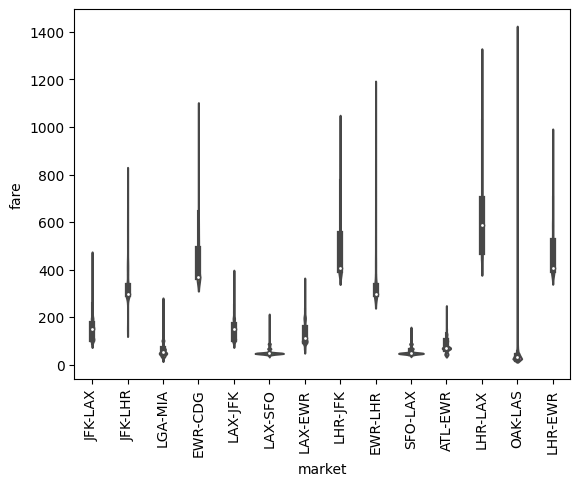

In [28]:
sns.violinplot(clip_df, x='market', y='fare');
plt.xticks(rotation=90);

More reasonable

## LHR-JFK
top top market

In [63]:
market = 'LHR-JFK'
market_df = df[df['market'] == market]
len(market_df)

11028

In [16]:
# x_bar =  market_df['fare'].mean()
# sigma =  market_df['fare'].std()

# market_df['zscore_fare'] = (market_df['fare'] - x_bar) / sigma

In [20]:
market_df.sort_values(by='fare', ascending=False).head()

,market,out_departure_date,shop_date,fare_rank,num_itin,fare,out_cxrs,solution_counts,shop_counts,avg_out_avail_max,avg_out_avail_low,outDeptDt_dt,shopDate_dt,days_til_dept,dept_dt_dow_int,dept_dt_dow,is_holiday,fr2_fare,fr2_out_cxrs,fr2_avg_out_avail_max,fr2_avg_out_avail_low,fr1_fr2_out_cxrs_same,fr1_fr2_out_cxrs_overlap,avg_fare_dtd,fare_prev_shop_day,fr2_fare_prev_shop_day,avg_out_avail_max_prev_shop_day,avg_out_avail_low_prev_shop_day,num_itin_prev_shop_day,shop_counts_prev_shop_day,solution_counts_prev_shop_day,fare_prev_dept_day,fare_next_dept_day,fare_diff_prev_dept_day,fare_diff_next_dept_day,trailing_avg_shop_counts,trailing_avg_solution_counts,trailing_avg_fare,trailing_std_fare,avg_diff_prev_dept_day,avg_diff_next_dept_day,est_fare_from_prev_dept_day,est_fare_from_next_dept_day,zscore_fare
126920,LHR-JFK,20231111,20221119,1,1,9446.48,[LX],34,3,0.0,0.0,2023-11-11,2022-11-19,357,5,Sat,0,9456.18,[LX],0.0,0.0,True,True,624.167500,687.38,791.38,1.0,0.0,1.0,2.0,25.0,405.18,761.93,9041.30,8684.55,2.00,25.00,687.3800,NaN,26.801320,18.472234,431.981320,780.402234,63.477287
44756,LHR-JFK,20231015,20221115,1,1,1565.58,[FI],45,1,0.0,1.0,2023-10-15,2022-11-15,334,6,Sun,0,1734.68,[TP],0.0,1.0,False,False,445.356923,540.38,590.38,1.0,0.0,3.0,8.0,300.0,403.38,403.38,1162.20,1162.20,5.00,161.00,522.6300,24.984995,-15.321122,16.757755,388.058878,420.137755,7.525536
133329,LHR-JFK,20231108,20221130,1,1,1414.98,[TP],93,3,1.0,0.0,2023-11-08,2022-11-30,343,2,Wed,0,1420.08,[TP],1.0,0.0,True,True,418.617500,410.98,415.98,1.0,0.0,1.0,1.0,7.0,409.58,409.58,1005.40,1005.40,5.25,176.75,460.2050,100.796838,-10.130026,-5.893072,399.449974,403.686928,6.456326
12064,LHR-JFK,20231102,20221117,1,2,1392.88,[TP],95,3,0.5,0.0,2023-11-02,2022-11-17,350,3,Thu,0,1397.88,[TP],1.0,0.0,True,True,416.600000,401.18,406.18,1.0,0.0,3.0,3.0,63.0,401.18,403.38,991.70,989.50,3.25,80.50,484.8925,165.160782,2.793596,-32.534122,403.973596,370.845878,6.299424
44156,LHR-JFK,20231029,20221103,1,1,1056.28,[TP],8,2,1.0,0.0,2023-10-29,2022-11-03,360,6,Sun,0,1058.88,[TP],1.0,0.0,True,True,753.130000,392.88,2331.98,0.0,0.0,1.0,1.0,4.0,737.73,771.28,318.55,285.00,1.00,4.00,392.8800,NaN,-15.134406,16.946287,722.595594,788.226287,3.909676


These are all very far out into the fture, with low shop counts

In [65]:
clip_df = market_df[market_df['days_til_dept'] <= 120]

In [24]:
clip_df.sort_values(by='fare', ascending=False)[
    ['shop_date', 'out_departure_date', 'days_til_dept', 'fare', 'out_cxrs', 'shop_counts', 'solution_counts', 'is_holiday']
].head()

,shop_date,out_departure_date,days_til_dept,fare,out_cxrs,shop_counts,solution_counts,is_holiday
54957,20221129,20230102,34,1007.23,[AT],756,25689,1
45433,20221130,20230101,32,950.38,[TK],629,24802,1
55005,20221130,20230102,33,944.08,[TP],668,23017,1
54812,20221126,20230102,37,929.38,[TK],706,22312,1
54666,20221123,20230102,40,896.03,[AT],702,29166,1


Now highest fares are holidays

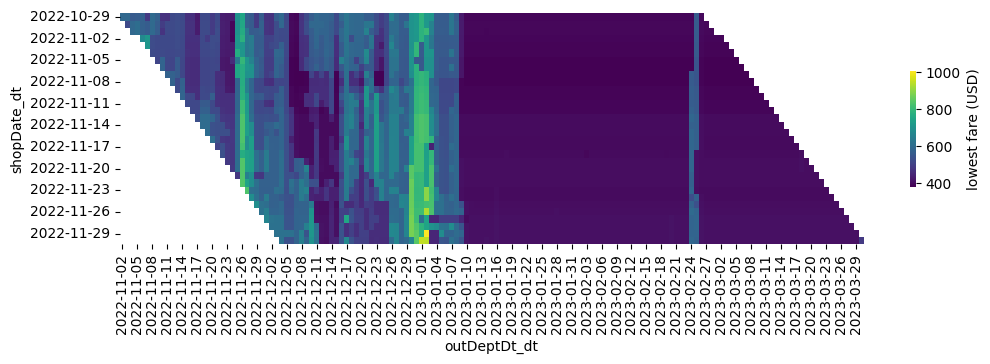

In [19]:
# clip_df = market_df[market_df['days_til_dept'] <= 120]
plt.figure(figsize=(12,3))
pvt_data = clip_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

Wow. Drop in fares starting 1/9/23. 

In [26]:
clip_df['fare'].describe()

count    3744.000000
mean      472.796840
std       109.735818
min       380.580000
25%       397.680000
50%       405.980000
75%       549.680000
max      1007.230000
Name: fare, dtype: float64

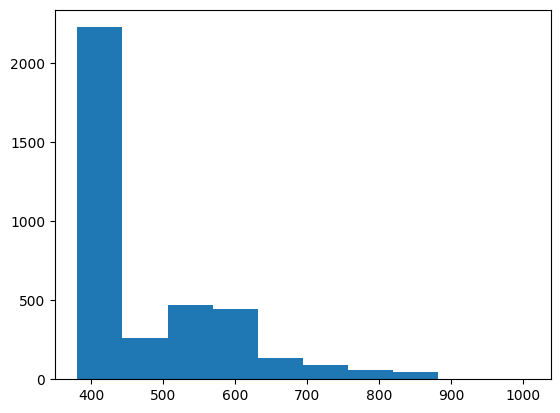

In [66]:
plt.hist(clip_df['fare']);

## OAK-LAS

In [67]:
market = 'OAK-LAS'
market_df = df[df['market'] == market]
len(market_df)

6027

In [68]:
clip_df = market_df[market_df['days_til_dept'] <= 120]
clip_df.sort_values(by='fare', ascending=False)[
    ['shop_date', 'out_departure_date', 'days_til_dept', 'fare', 'out_cxrs', 'shop_counts', 'solution_counts', 'is_holiday']
].head()

,shop_date,out_departure_date,days_til_dept,fare,out_cxrs,shop_counts,solution_counts,is_holiday
49980,20221108,20230302,114,1411.61,[AA],2,3,0
114633,20221126,20230217,83,312.20,[DL],10,119,0
114670,20221128,20230317,109,293.60,[DL],10,197,0
114620,20221126,20230317,111,293.60,[DL],7,176,0
103433,20221113,20230220,99,238.60,[DL],3,12,0


Highest fares are *not* holidays

In [31]:
clip_df['fare'].describe()

count    3743.000000
mean       38.028488
std        32.402260
min        23.970000
25%        23.970000
50%        33.970000
75%        38.980000
max      1411.610000
Name: fare, dtype: float64

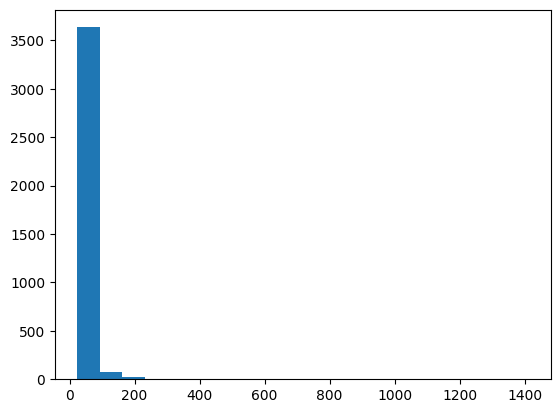

In [70]:
plt.hist(clip_df['fare'], bins=20);

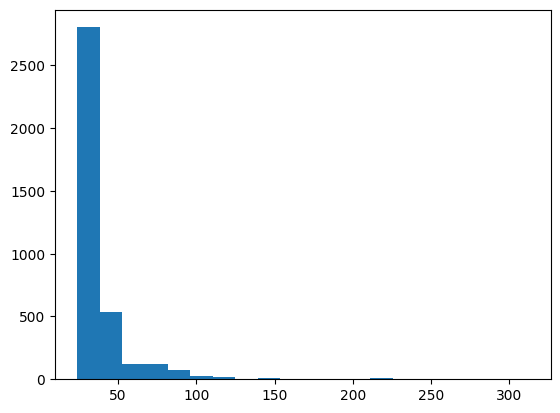

In [72]:
plt.hist(clip_df[clip_df['fare'] < 500]['fare'], bins=20);

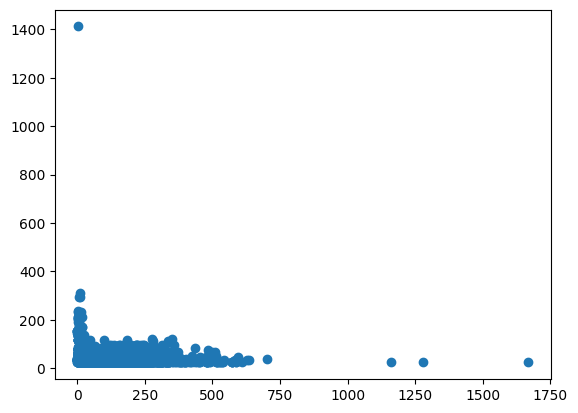

In [32]:
plt.scatter(clip_df['shop_counts'], clip_df['fare']);

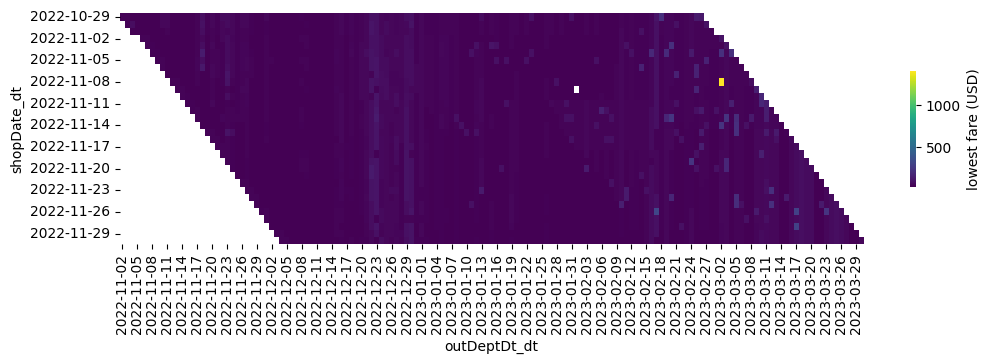

In [33]:
plt.figure(figsize=(12,3))
pvt_data = clip_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,}
                );

In [40]:
np.percentile(clip_df['fare'], 99)

138.6

In [42]:
from scipy import stats

In [43]:
stats.percentileofscore(clip_df['fare'], 200)

99.49238578680203

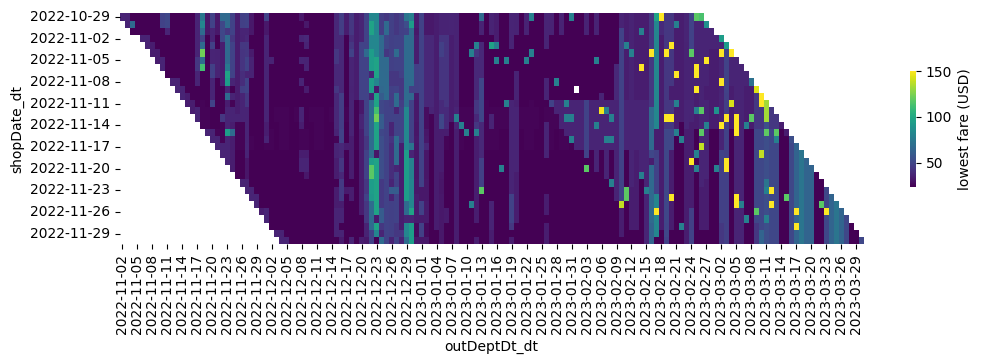

In [44]:
plt.figure(figsize=(12,3))
pvt_data = clip_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,},
            vmax=150
                );

## LAX-JFK

In [73]:
market = 'LAX-JFK'
market_df = df[df['market'] == market]

len(market_df)

9641

In [74]:
clip_df = market_df[market_df['days_til_dept'] <= 120]
clip_df.sort_values(by='fare', ascending=False)[
    ['shop_date', 'out_departure_date', 'days_til_dept', 'fare', 'out_cxrs', 'shop_counts', 'solution_counts', 'is_holiday']
].head()

,shop_date,out_departure_date,days_til_dept,fare,out_cxrs,shop_counts,solution_counts,is_holiday
58829,20221111,20221228,47,382.10,[AA],430,8308,1
58907,20221112,20221116,4,326.61,[B6],902,26231,0
73428,20221112,20221117,5,322.60,[AA],957,26223,0
47237,20221031,20221223,53,317.10,[AA],419,11980,1
47333,20221104,20221230,56,307.09,[AA],367,7857,1


In [49]:
clip_df['fare'].describe()

count    3744.000000
mean      149.835569
std        41.613497
min        89.600000
25%       108.600000
50%       151.600000
75%       168.600000
max       382.100000
Name: fare, dtype: float64

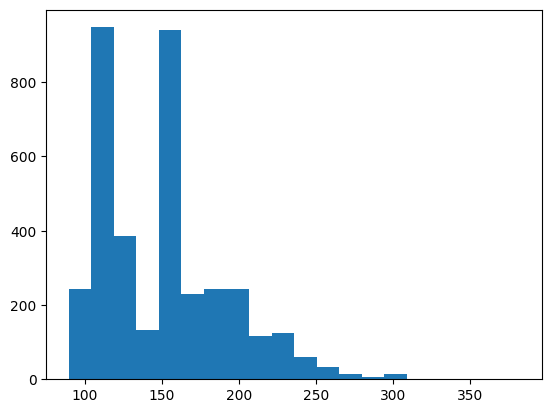

In [75]:
plt.hist(clip_df['fare'], bins=20);

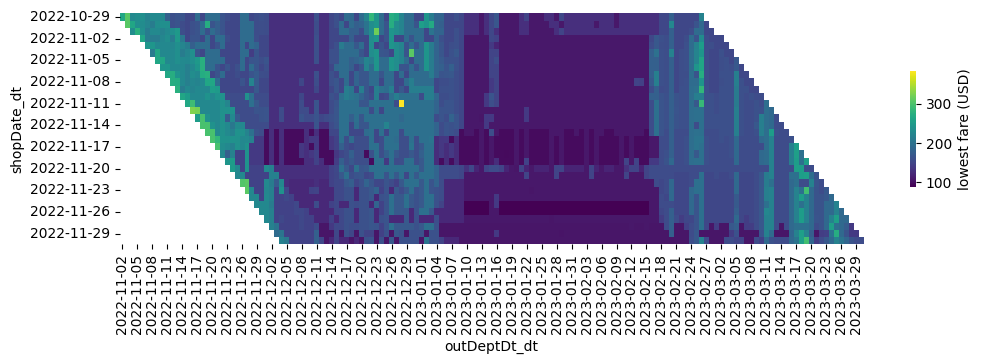

In [50]:
plt.figure(figsize=(12,3))
pvt_data = clip_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

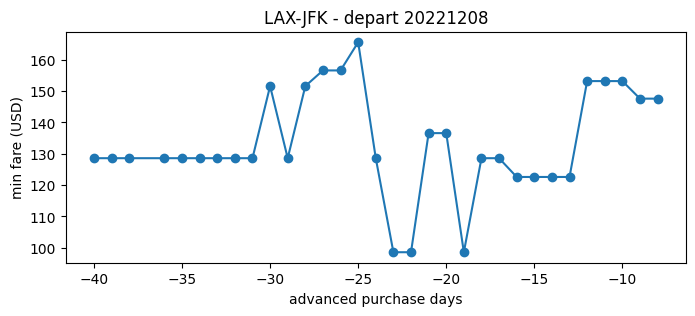

In [54]:
plot_min_fare(market_df, 20221208, market)

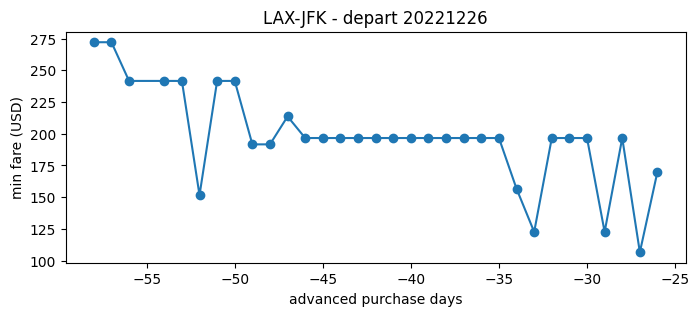

In [55]:
plot_min_fare(market_df, 20221226, market)

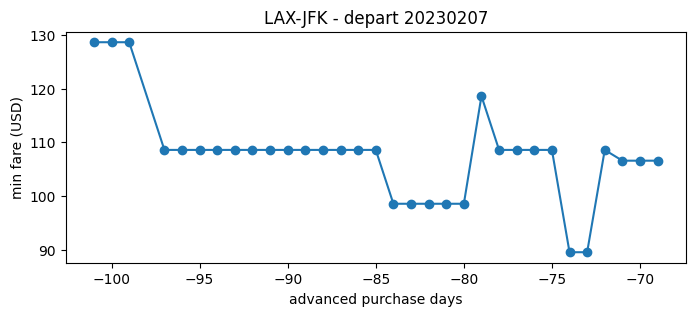

In [56]:
plot_min_fare(market_df, 20230207, market)

## SFO-LAX

In [78]:
market = 'SFO-LAX'
market_df = df[df['market'] == market]

len(market_df)

8459

In [79]:
clip_df = market_df[market_df['days_til_dept'] <= 120]
clip_df.sort_values(by='fare', ascending=False)[
    ['shop_date', 'out_departure_date', 'days_til_dept', 'fare', 'out_cxrs', 'shop_counts', 'solution_counts', 'is_holiday']
].head()

,shop_date,out_departure_date,days_til_dept,fare,out_cxrs,shop_counts,solution_counts,is_holiday
80467,20221029,20221106,8,153.2,[UA],1320,36921,0
103988,20221031,20230217,109,133.6,[B6],19,1332,0
103948,20221030,20230217,110,133.6,[B6],24,1020,0
104758,20221120,20221223,33,133.6,[B6],386,14297,1
104068,20221103,20230217,106,133.6,[B6],50,1910,0


In [59]:
clip_df['fare'].describe()

count    3744.000000
mean       55.481416
std        14.139948
min        39.860000
25%        48.600000
50%        48.600000
75%        58.600000
max       153.200000
Name: fare, dtype: float64

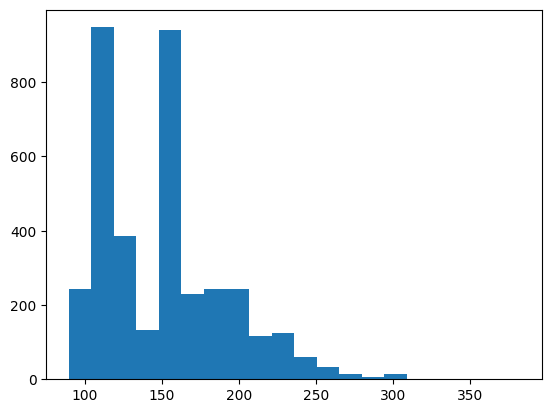

In [76]:
plt.hist(clip_df['fare'], bins=20);

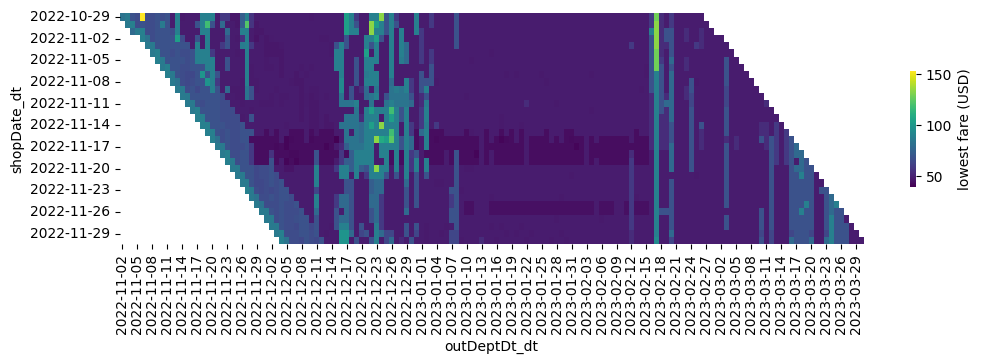

In [61]:
# clip_market_df = market_df[market_df['days_til_dept'] <= 120]
plt.figure(figsize=(12, 3))
pvt_data = clip_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,}
           );

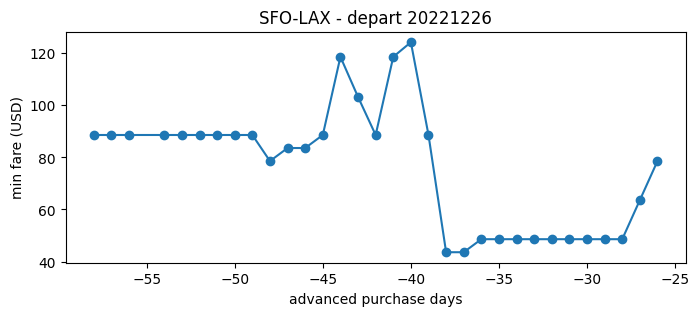

In [81]:
plot_min_fare(market_df, 20221226, market)

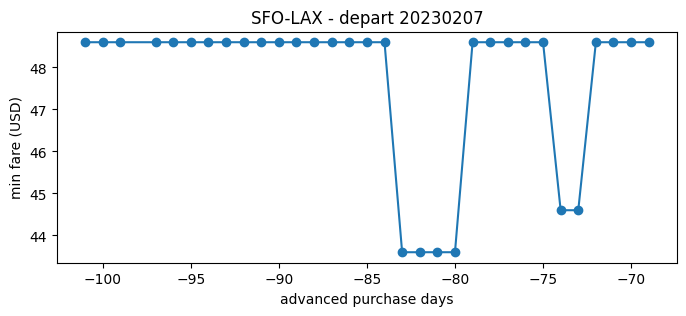

In [80]:
plot_min_fare(market_df, 20230207, market)

## EWR-CDG

In [82]:
market = 'EWR-CDG'
market_df = df[df['market'] == market]
len(market_df)

11446

In [83]:
clip_df = market_df[market_df['days_til_dept'] <= 120]
clip_df.sort_values(by='fare', ascending=False)[
    ['shop_date', 'out_departure_date', 'days_til_dept', 'fare', 'out_cxrs', 'shop_counts', 'solution_counts', 'is_holiday']
].head()

,shop_date,out_departure_date,days_til_dept,fare,out_cxrs,shop_counts,solution_counts,is_holiday
5194,20221117,20221222,35,1053.8,[UA],932,14166,1
4580,20221105,20221222,47,1028.8,[UA],355,8165,1
4683,20221107,20221222,45,1028.8,[UA],481,11121,1
4478,20221103,20221222,49,1028.8,[UA],521,10976,1
4938,20221112,20221222,40,1028.8,[UA],1081,14013,1


In [84]:
clip_df['fare'].describe()

count    3744.000000
mean      437.609199
std       126.070347
min       359.100000
25%       368.500000
50%       369.500000
75%       485.530000
max      1053.800000
Name: fare, dtype: float64

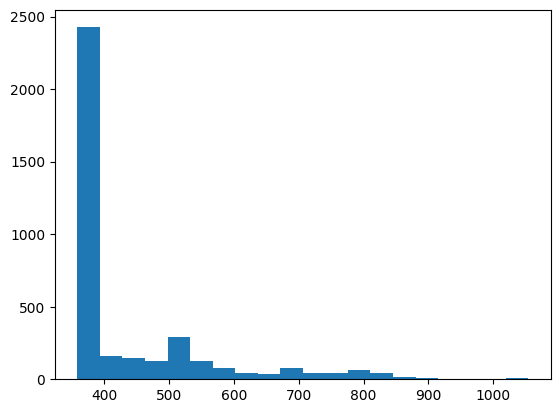

In [85]:
plt.hist(clip_df['fare'], bins=20);

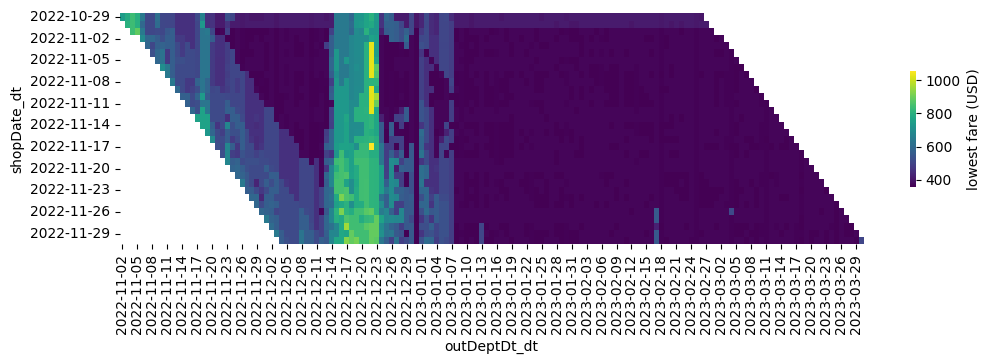

In [86]:
plt.figure(figsize=(12,3))
pvt_data = clip_df.pivot(index="shopDate_dt", columns="outDeptDt_dt", values="fare")
sns.heatmap(pvt_data, cmap='viridis', #square=True,
                cbar_kws={'label': 'lowest fare (USD)',
                            'shrink': 0.5,
                            }
                );

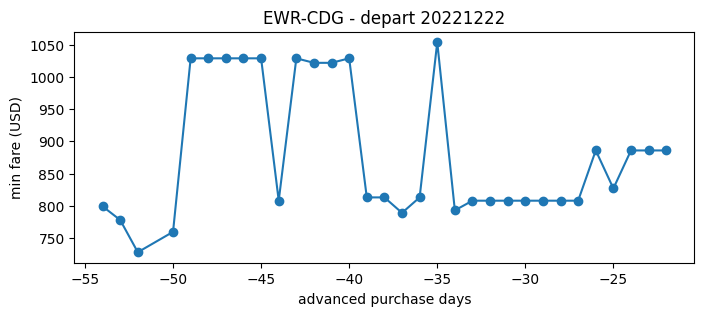

In [89]:
plot_min_fare(market_df, 20221222, market)

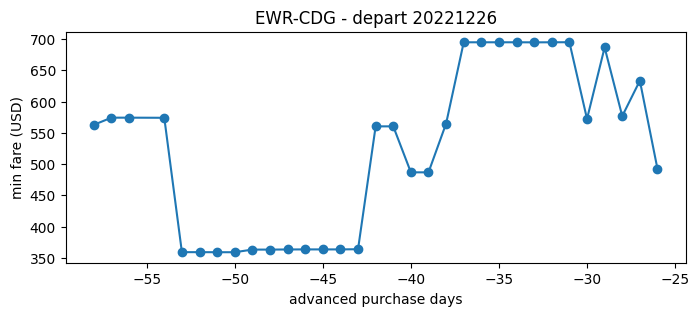

In [87]:
plot_min_fare(market_df, 20221226, market)

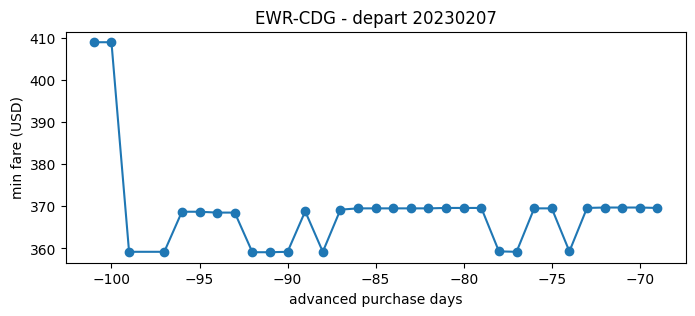

In [88]:
plot_min_fare(market_df, 20230207, market)